# Trabalho de casa 3

## Data Dictionary

|variable                       |description |
|:------------------------------|:-----------|
|hotel                          | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      | Number of days that elapsed between the entering date of the booking into the PMS (Property Management System) and the arrival date |
|arrival_date_year              | Year of arrival date|
|arrival_date_month             | Month of arrival date|
|arrival_date_week_number       | Week number of year for arrival date|
|arrival_date_day_of_month      | Day of arrival date|
|stays_in_weekend_nights        | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         | Number of adults|
|children                       | Number of children|
|babies                         |Number of babies |
|meal                           | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 | Market segment designation. In categories, the term "TA" means "Travel Agents" and "TO" means "Tour Operators" |
|distribution_channel           | Booking distribution channel. The term "TA" means "Travel Agents" and "TO" means "Tour Operators" |
|is_repeated_guest              | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          | ID of the travel agency that made the booking |
|company                        | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    | Number of car parking spaces required by the customer |
|total_of_special_requests      | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|

# 47275 - Joel Tapia<br>47817 - João Mendonça

# Automated learning

In [35]:
#ALL IMPORTS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error, r2_score, mean_absolute_error,silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [2]:
# Displaying the first 20 rows of the dataframe
data_train = pd.read_csv("train.csv")

data_train.dtypes

#data_train.head(10)

Hotel                              object
Is_canceled                         int64
Lead_time                           int64
Arrival_date_year                   int64
Arrival_date_month                 object
Arrival_date_week_number            int64
Arrival_date_day_of_month           int64
Stays_in_weekend_nights             int64
Stays_in_week_nights                int64
Adults                              int64
Children                            int64
Babies                              int64
Meal                               object
Country                            object
Market_segment                     object
Distribution_channel               object
Is_repeated_guest                   int64
Previous_cancellations              int64
Previous_bookings_not_canceled      int64
Reserved_room_type                 object
Assigned_room_type                 object
Booking_changes                     int64
Deposit_type                       object
Agent                             

In [3]:
#We create the test csv file
data_test = pd.read_csv("test.csv")

data_test.head(20)

,Hotel,Lead_time,Arrival_date_year,Arrival_date_month,Arrival_date_week_number,Arrival_date_day_of_month,Stays_in_weekend_nights,Stays_in_week_nights,Adults,Children,...,Deposit_type,Agent,Company,Days_in_waiting_list,Customer_type,Adr,Required_car_parking_spaces,Total_of_special_requests,Reservation_status,Reservation_status_date
0,Resort Hotel,342,2015,July,27,1,0,0,2,0,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,737,2015,July,27,1,0,0,2,0,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,7,2015,July,27,1,0,1,1,0,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,13,2015,July,27,1,0,1,1,0,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,14,2015,July,27,1,0,2,2,0,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,14,2015,July,27,1,0,2,2,0,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,2015,July,27,1,0,2,2,0,...,No Deposit,0.0,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,9,2015,July,27,1,0,2,2,0,...,No Deposit,303.0,0.0,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,85,2015,July,27,1,0,3,2,0,...,No Deposit,240.0,0.0,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,75,2015,July,27,1,0,3,2,0,...,No Deposit,15.0,0.0,0,Transient,105.50,0,0,Canceled,2015-04-22


In [4]:
#Not ever run, just one time
data_train.to_csv('train.csv', index=False)
data_test.to_csv('test.csv', index=False)

In [5]:
#Encoding object columns
categorical_columns = data_train.select_dtypes(include=['object']).columns

# Datos de entrenamiento y prueba
y = data_train["Is_canceled"]
#features = ["Lead_time", "Country" , "Agent", "Is_repeated_guest", "Assigned_room_type", "Customer_type","Arrival_date_week_number"]

#features = ["Lead_time","Country","Is_repeated_guest","Total_of_special_requests", "Assigned_room_type","Previous_cancellations", "Customer_type"]
X = pd.get_dummies(data_train, columns=categorical_columns, drop_first=True)

# Dividir datos en entrenamiento y prueba
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

## Modelo de Random Forest

In [6]:
## RANDOM FOREST

# Definir el modelo
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred = model.predict(X_valid)

# Medir la precisión
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy}')

# Reporte de clasificación
print(classification_report(y_valid, y_pred))

# Matriz de confusión
print(confusion_matrix(y_valid, y_pred))


Accuracy: 0.9824105871513527
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     15129
           1       1.00      0.95      0.98      8749

    accuracy                           0.98     23878
   macro avg       0.99      0.98      0.98     23878
weighted avg       0.98      0.98      0.98     23878

[[15129     0]
 [  420  8329]]


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


In [8]:
best_params = grid_search.best_params_

best_model = RandomForestClassifier(**best_params, random_state=1)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print(f'Precisión del modelo con los mejores parámetros: {accuracy}')

# Reporte de clasificación
print(classification_report(y_valid, y_pred))

# Matriz de confusión
print(confusion_matrix(y_valid, y_pred))

Precisión del modelo con los mejores parámetros: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15129
           1       1.00      1.00      1.00      8749

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878

[[15129     0]
 [    0  8749]]


## XGBClassifier

In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Definir el modelo
xgb_model = XGBClassifier(random_state=1)

# Definir el grid de parámetros
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=1)
random_search.fit(X_train, y_train)

# Evaluar el modelo con los mejores parámetros
best_xgb_model = random_search.best_estimator_
y_pred = best_xgb_model.predict(X_valid)

# Medir la precisión
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


## Modelo de Regresion Logistica

In [10]:
# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=95510)

# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=95510)

In [11]:
y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_valid, y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15129
           1       1.00      1.00      1.00      8749

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



### Standardize

In [12]:
scaler = StandardScaler()
X_train_L = scaler.fit_transform(X_train)
X_valid_L = scaler.transform(X_valid)

model = LogisticRegression(max_iter=95510)
model.fit(X_train_L, y_train)

y_pred = model.predict(X_valid_L)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_valid, y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15129
           1       1.00      1.00      1.00      8749

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



### Normalization

In [13]:
scaler = MinMaxScaler()
X_train_L = scaler.fit_transform(X_train)
X_valid_L = scaler.transform(X_valid)

model = LogisticRegression(max_iter=95510)
model.fit(X_train_L, y_train)

y_pred = model.predict(X_valid_L)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_valid, y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15129
           1       1.00      1.00      1.00      8749

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



### Cross Validation

In [14]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


## Modelo Linear Regression

In [18]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_valid, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_valid, y_pred)
print(f'Error Absoluto Medio (MAE): {mae}')

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(y_valid, y_pred)
print(f'Coeficiente de Determinación (R^2): {r2}')

Error Cuadrático Medio (MSE): 6.889750299073115e-14
Error Absoluto Medio (MAE): 5.602752652756456e-09
Coeficiente de Determinación (R^2): 0.9999999999997032


### Standardize

In [42]:
scaler = StandardScaler()
X_train_LI = scaler.fit_transform(X_train)

model = LinearRegression()

model.fit(X_train_LI, y_train)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_valid, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_valid, y_pred)
print(f'Error Absoluto Medio (MAE): {mae}')

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(y_valid, y_pred)
print(f'Coeficiente de Determinación (R^2): {r2}')

Error Cuadrático Medio (MSE): 6.889750299073115e-14
Error Absoluto Medio (MAE): 5.602752652756456e-09
Coeficiente de Determinación (R^2): 0.9999999999997032


### Normalization

In [43]:
scaler = MinMaxScaler()
X_train_LI = scaler.fit_transform(X_train)

model = LinearRegression()

model.fit(X_train_LI, y_train)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_valid, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_valid, y_pred)
print(f'Error Absoluto Medio (MAE): {mae}')

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(y_valid, y_pred)
print(f'Coeficiente de Determinación (R^2): {r2}')

Error Cuadrático Medio (MSE): 6.889750299073115e-14
Error Absoluto Medio (MAE): 5.602752652756456e-09
Coeficiente de Determinación (R^2): 0.9999999999997032


### Cross Validation

In [25]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 0.9999999999999771


## K-Means CLustering

In [32]:
scaler = StandardScaler()
X_train_K = scaler.fit_transform(X_train)

kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X_train_K)

Inertia: 110594563.52870011
Silhouette Score: -0.04618333074441832


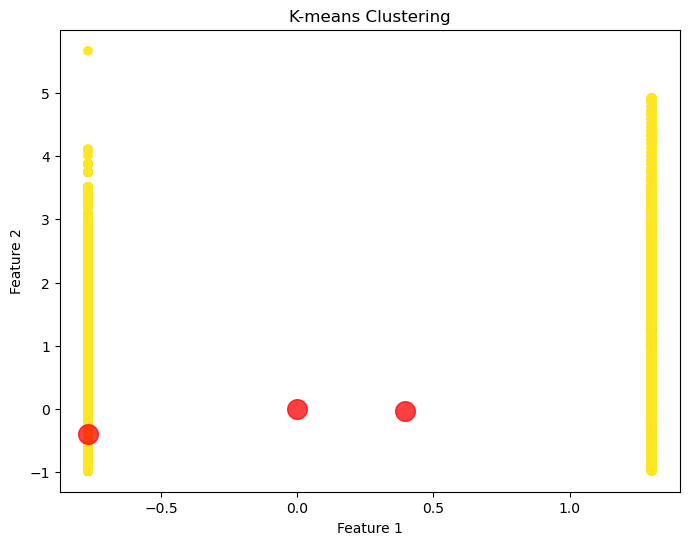

In [37]:
print(f'Inertia: {kmeans.inertia_}')

silhouette_avg = silhouette_score(X_train_K, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')


plt.figure(figsize=(8, 6))
plt.scatter(X_train_K[:, 0], X_train_K[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

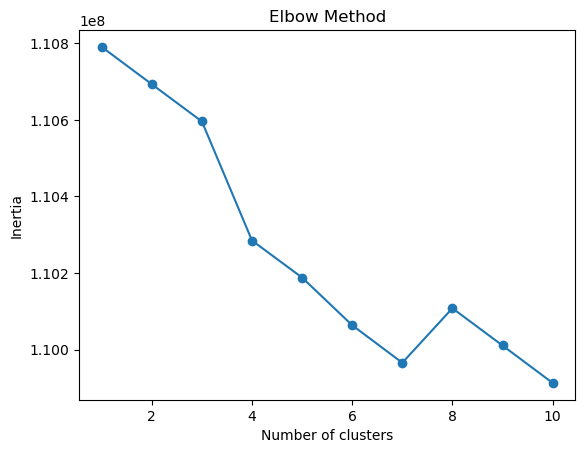

In [39]:
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_K)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [41]:
scaler = StandardScaler()
X_train_K = scaler.fit_transform(X_train)

kmeans = KMeans(n_clusters=7, random_state=0)
y_kmeans = kmeans.fit_predict(X_train_K)

print(f'Inertia: {kmeans.inertia_}')

Inertia: 110205831.62522444
